In [27]:
import process as pc
import detection as dt
import dataset as ds
from IPython.core.interactiveshell import InteractiveShell

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import joblib
import cv2

import numpy as np

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

In [28]:
def print_image(image, keypoints : np.ndarray, scores : np.ndarray):
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if keypoints is None:
        pass
    elif keypoints.shape == (4,):
        rect = patches.Rectangle((keypoints[0], keypoints[1]), keypoints[2]-keypoints[0], keypoints[3]-keypoints[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(keypoints[0], keypoints[1], f'{scores[0]:.2f}', color='b')
    else:
        for i, kp in enumerate(keypoints):
            rect = patches.Rectangle((kp[0], kp[1]), kp[2]-kp[0], kp[3]-kp[1], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(kp[0], kp[1], f'{scores[i]:.2f}', color='b')
    plt.show();

In [29]:
pipeline_save_path = ds.DATA_PATH+"/hog_new_dataset.pkl"
image_path = ds.DATA_PATH+"/final/Cat.jpeg"

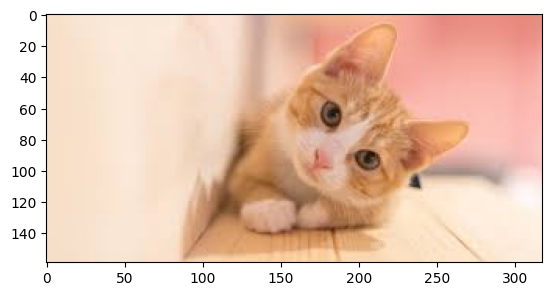

In [30]:
from skimage.feature import hog
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

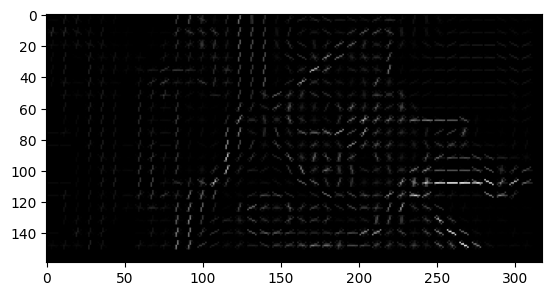

In [31]:
image = cv2.imread(image_path)
image = pc.process_image(image, resize=False, denoise=True)
features, hog_img = hog(image, visualize=True)
plt.imshow(hog_img, cmap='gray');

In [32]:
image.shape

(159, 318)

In [33]:
image = cv2.imread(image_path)
ratios = None
if (image.shape[0] > 512 and image.shape[1] > 512):
    ratio_1 = 2 if image.shape[0] // 512 < 2 else image.shape[0] // 512
    ratio_2 = 2 if image.shape[1] // 512 < 2 else image.shape[1] // 512
    shapes = (image.shape[1] // ratio_2, image.shape[0] // ratio_1)
    params_reshape = {
        'resize': True,
        'image_size': shapes
    }
    ratios = [ratio_1, ratio_2]
    shapes, ratios
    img = cv2.resize(image, shapes)
    img.shape

else:
    params_reshape = {
        'resize': False
    }


In [34]:
pipeline = joblib.load(pipeline_save_path)
boxes, face_kp, scores = dt.detect_faces(image, pipeline, method='HOG', threshold=0.62, overlap_threshold=0.15, window_size=(96,96), step_size=(16,16),\
                                n_keypoints=8100, **params_reshape, verbose=False, notebook=True)

In [ ]:
boxes, scores

(None, None)

In [ ]:
if ratios:
    if boxes is None:
        pass
    elif boxes.shape == (4,):
        boxes = [boxes[i] * ratios[1] if i%2==0 else boxes[i] * ratios[0] for i in range(len(boxes))]
        boxes = np.array(boxes)
    else:
        box_shape = boxes.shape[0]
        for box in boxes:
            box = [int(box[i] * ratios[1]) if i%2==0 else int(box[i] * ratios[0]) for i in range(len(box))]
            boxes = np.vstack((boxes, box))
        box_shape
        boxes = np.delete(boxes, np.s_[:box_shape], axis=0)
boxes

In [ ]:
for fc in face_kp:
    print(fc[1:])

In [ ]:
for i in range(len(face_kp)):
    plt.imshow(face_kp[i][0])
    plt.show();


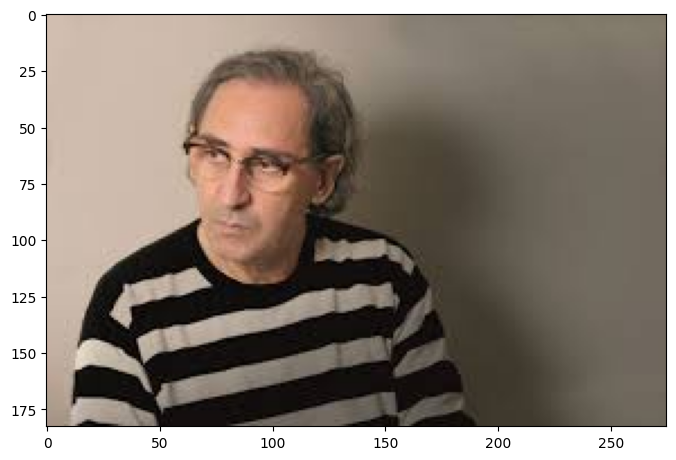

In [ ]:
image = cv2.imread(image_path)
print_image(image, boxes, scores)
#guardo la specifica per capire dove deve essere inserito il punteggio